# COGS 108 - Final Project

# Permissions

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

[X] YES - make available
[ ] NO - keep private

# Overview

In [39]:
# FINAL RESULT (SUMMARY) -Wilson

# Names

- Yilan Guo
- Xueru Xie
- Jinsong Yang
- Zeqian Min
- Eric Wang

# Group Members IDs

- A15563949
- A15451232
- A15389337
- A15481129
- A15545920

# Research Question

In [44]:
# Our question was not good.

# Background and Prior Work
# If our research question is not about race, delete second paragraph.

We are interested in studying gun shooting events in America because we want to know how serious is this affecting many Americans. We want to know why American people keep dying under mass shootings. Specifically, we want to know how a gun shooting happens, why a gun shooting happens, and who a gun shooting targets. Our first hypothesis is that gun shooting events should decrease after the outbreak of COVID-19 because of the stay home orders that prevent people shooting others. The article from Bloogberg confirms our prediction, since "the number of mass shooting incidents, killings and firearm injuries all dropped as states and cities took aggressive measures to contain the virus" (2).

Besides looking for the gun shooting rate between pre-COVID and post-COVID, we also want to know about the correlation between gun violence and race because we want to know whether a certain race is being discriminated by the police force. CNN has done a research on the similar topic, showing a chart of how black Americans has more firarm homicide death rate than white Americans (1). We want to know whether there is a similar trend between the race and the police when it comes to police shooting.

References (include links):

1) https://www.cnn.com/2018/04/23/health/gun-deaths-in-men-by-state-study/index.html
2) https://www.bloomberg.com/news/articles/2020-05-09/one-good-thing-from-the-pandemic-mass-shootings-in-u-s-plunge

# Hypothesis

In [42]:
# Not good enough -Vacant

# Dataset(s)

Dataset Name:
Link to the dataset: https://github.com/washingtonpost/data-police-shootings
Number of observations: 5865 rows, 17 columns
1-2 sentences describing each dataset.

Our dataset comes from the Washington Post database. This dataset contains every fatal shooting in America by the police, starting from January, 2015 to December, 2020. Each observation contains the incident ID, name of the person that is killed by the police, the date being killed, type of death, the person's weapon, age, gender race, city, state, mental illness sign, threat level, flee condition, body camera of the police, geographic location of the incident, and whether there is exact geocoding of the incident.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Cleaning


In [21]:
data = pd.read_csv('fatal-police-shootings-data.csv')
data.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
5860,6401,Mark Brewer,2020-12-06,shot,screwdriver,28.0,M,NaN,St. Louis,MO,False,other,Not fleeing,False,-90.260,38.586,True
5861,6411,Donald Edwin Saunders,2020-12-06,shot,gun,37.0,M,B,Dayton,OH,False,attack,Not fleeing,False,-84.138,39.772,True
5862,6408,NaN,2020-12-08,shot,hammer,NaN,M,NaN,Las Vegas,NV,False,attack,Not fleeing,False,-115.286,36.096,True
5863,6409,NaN,2020-12-08,shot,undetermined,NaN,M,NaN,Gates,OR,False,undetermined,NaN,False,-122.417,44.756,True
5864,6410,Dylan Ray Scott,2020-12-08,shot,unarmed,27.0,M,W,Riverview,FL,True,attack,Car,True,-82.320,27.893,True


In [3]:
data.dtypes, data.isnull().sum()

(id                           int64
 name                        object
 date                        object
 manner_of_death             object
 armed                       object
 age                        float64
 gender                      object
 race                        object
 city                        object
 state                       object
 signs_of_mental_illness       bool
 threat_level                object
 flee                        object
 body_camera                   bool
 longitude                  float64
 latitude                   float64
 is_geocoding_exact            bool
 dtype: object,
 id                           0
 name                       207
 date                         0
 manner_of_death              0
 armed                      212
 age                        254
 gender                       1
 race                       551
 city                         0
 state                        0
 signs_of_mental_illness      0
 threat_level       

In [45]:
# MORE

# Data Analysis -Wilson

# Univariate Analysis

Text(0.5, 0, 'Race')

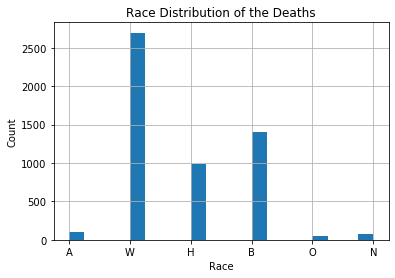

In [10]:
data['race'].hist(bins=20)
plt.title('Race Distribution of the Deaths')
plt.ylabel('Count')
plt.xlabel('Race')

Text(0.5, 0, 'Age')

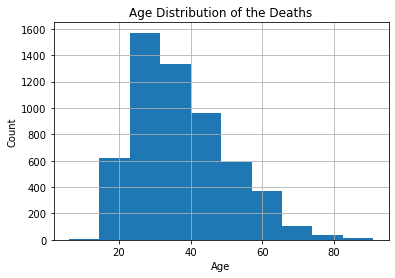

In [11]:
data['age'].hist()
plt.title('Age Distribution of the Deaths')
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'Gender')

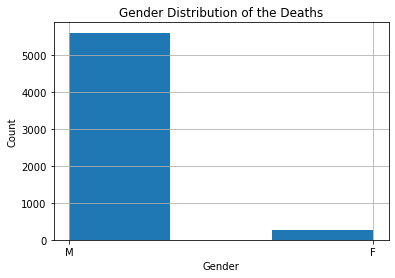

In [12]:
data['gender'].hist(bins=3)
plt.title('Gender Distribution of the Deaths')
plt.ylabel('Count')
plt.xlabel('Gender')

# Bivariate Analysis

In [15]:
# What is the distribution of both gender and race?

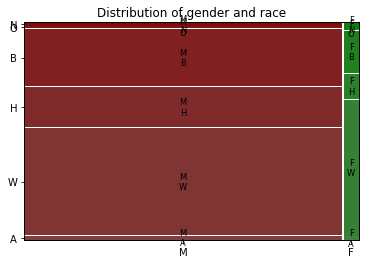

In [16]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['gender', 'race'],)
plt.title('Distribution of gender and race')
plt.show()

In [17]:
# Compare yearly deaths.

In [18]:
year = []
for date in data['date']:
    year.append(int(date[:4])) # Append year, such as 2015, 2016..

In [34]:
data['year'] = year

Text(0.5, 0, 'Year')

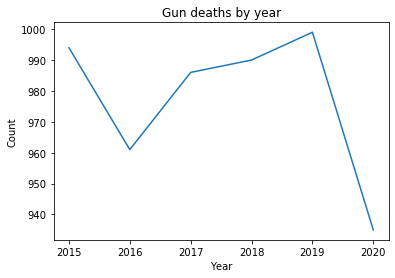

In [35]:
data.groupby('year').count()['id'].plot.line()
plt.title('Gun deaths by year')
plt.ylabel('Count')
plt.xlabel('Year')
# Note that our 2020 data only contains date until December. So the result below may not accurate reflect the truth.

In [22]:
# Relationship between unarmed and race

Text(0, 0.5, 'count')

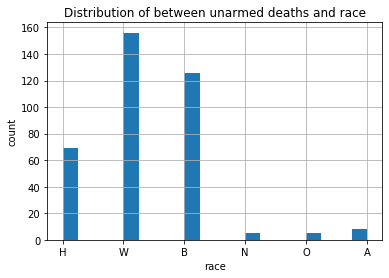

In [23]:
unarmed = data[data['armed'] == 'unarmed']
unarmed['race'].hist(bins= 20)
plt.title('Distribution of between unarmed deaths and race')
plt.xlabel('race')
plt.ylabel('count')

In [24]:
# Unarmed and not-flee

Text(0, 0.5, 'count')

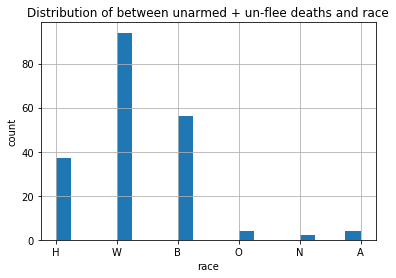

In [25]:
unarmed_unflee = unarmed[unarmed['flee']== 'Not fleeing']
unarmed_unflee['race'].hist(bins=20)
plt.title('Distribution of between unarmed + un-flee deaths and race')
plt.xlabel('race')
plt.ylabel('count')

In [26]:
# Deaths and States

In [27]:
data.groupby('state').count()['id'].head()

state
AK     41
AL    106
AR     84
AZ    272
CA    872
Name: id, dtype: int64

In [28]:
# Body camera on vs. race

In [29]:
race_cam_off = data[data['body_camera']==False].groupby('race').count()['id']
race_cam_on = data[data['body_camera']==True].groupby('race').count()['id']
race_cam_on/(race_cam_on + race_cam_off)

race
A    0.166667
B    0.172708
H    0.134010
N    0.170732
O    0.127660
W    0.101224
Name: id, dtype: float64

In [30]:
# Unarmed vs. race

In [31]:
race_unarmed = data[data['armed']=='unarmed'].groupby('race').count()['id']
race_armed = data[data['armed']!='unarmed'].groupby('race').count()['id']
race_unarmed/(race_armed+race_unarmed)

race
A    0.083333
B    0.089552
H    0.070051
N    0.060976
O    0.106383
W    0.057842
Name: id, dtype: float64

02/03 when CDC declared emergency outbreak

In [32]:
after = data[data['date']  >= '2020-02-03']
before = data[data['date']  < '2020-02-03']

# Results

# Ethics & Privacy

# Conclusion & Discussion

# Team Contributions

In [43]:
# Write down what u did, in sentence/paragraph form.